In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
print('done')

done


Read in the dataset and view features

In [2]:
df_train = pd.read_csv(r'C:\Users\Julia\Desktop\nyc-taxi-trip-duration\train\train.csv')
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [3]:
df_train.shape

(1458644, 11)

In [4]:
df_train.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

### Remove rows will null values

In [5]:
df_train.dropna()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


In [6]:
df_train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


### Change Datatypes
The pickup and dropoff datetime features have the datatype 'object', so they will be converted to datetime

In [7]:
#Convert pickup_datetime and dropoff_datetime columns to datetime datatype
df_train[["pickup_datetime", "dropoff_datetime"]] = df_train[["pickup_datetime", "dropoff_datetime"]].apply(pd.to_datetime)

In [8]:
df_train.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

### Plot Coordinates

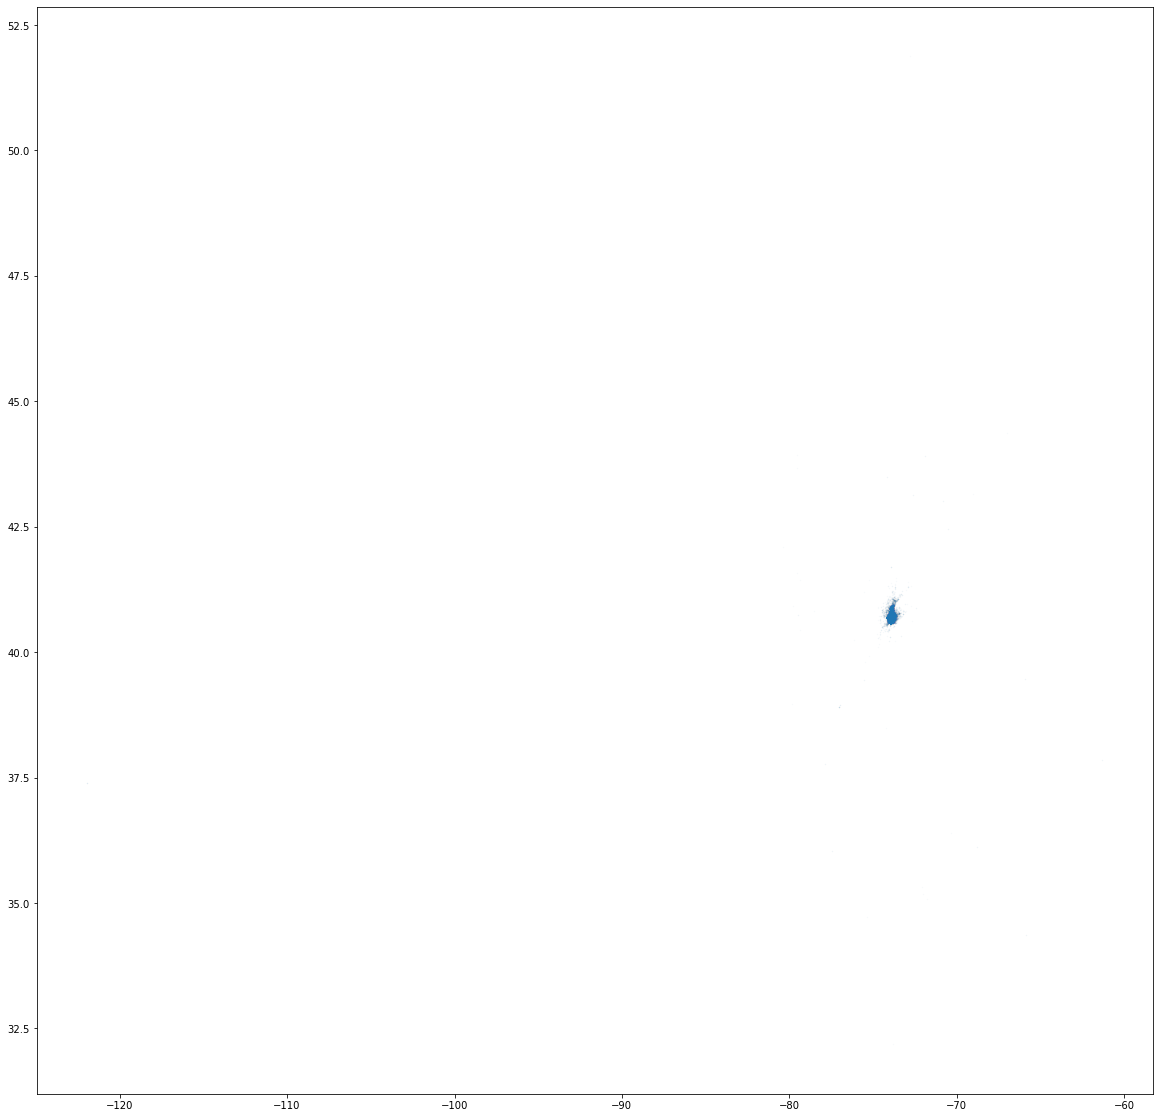

In [9]:
#Plotting pickup and dropoff coordinates
latitude = list(df_train['pickup_latitude']) + list(df_train['dropoff_latitude'])
longitude = list(df_train['pickup_longitude']) + list(df_train['dropoff_longitude'])

plt.figure(figsize = (20, 20))
plt.plot(longitude, latitude, '.', alpha = 0.5, markersize = 0.05) 
plt.show()

Based on the above plot of the pickup and dropoff coordinates, we can easily see there are some extreme outliers.

In [10]:
print('max pickup long:', df_train.pickup_longitude.max(), 'min pickup lat:', df_train.pickup_latitude.min(), 'max dropoff long:', df_train.dropoff_longitude.max(), 'min dropoff long:', df_train.dropoff_longitude.min())

max pickup long: -61.33552932739258 min pickup lat: 34.359695434570305 max dropoff long: -61.33552932739258 min dropoff long: -121.9333038330078


In [11]:
print('trip duration max:', df_train.trip_duration.max(), 'trip duration min:', df_train.trip_duration.min())

trip duration max: 3526282 trip duration min: 1


In [12]:
print('trip duration median:', df_train.trip_duration.median(), 'mean:', df_train.trip_duration.mean())

trip duration median: 662.0 mean: 959.4922729603659


### Remove very distant pickup and dropoff points
To remove outliers in the coordinates, we will limit entries to those that are roughly within the boundaries of New York City. 

In [13]:
#setting coordinate boundaries
xlim = [-74.05, -73.75]
ylim = [40.60, 40.90]

df_train = df_train[(df_train.pickup_longitude > xlim[0]) & (df_train.pickup_longitude < xlim[1])]
df_train = df_train[(df_train.dropoff_longitude > xlim[0]) & (df_train.dropoff_longitude < xlim[1])]
df_train = df_train[(df_train.pickup_latitude > ylim[0]) & (df_train.pickup_latitude < ylim[1])]
df_train = df_train[(df_train.dropoff_latitude > ylim[0]) & (df_train.dropoff_latitude < ylim[1])]

In [14]:
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [15]:
df_train.shape

(1451343, 11)

In [16]:
df_train.vendor_id.value_counts()

2    776352
1    674991
Name: vendor_id, dtype: int64

In [17]:
df_train.passenger_count.value_counts()

1    1028474
2     209095
5      77745
3      59610
6      48131
4      28228
0         58
8          1
7          1
Name: passenger_count, dtype: int64

### Plot Restricted Coordinate Set
We will generate a new plot of the coordinates now that we have defined the x and y boundaries.

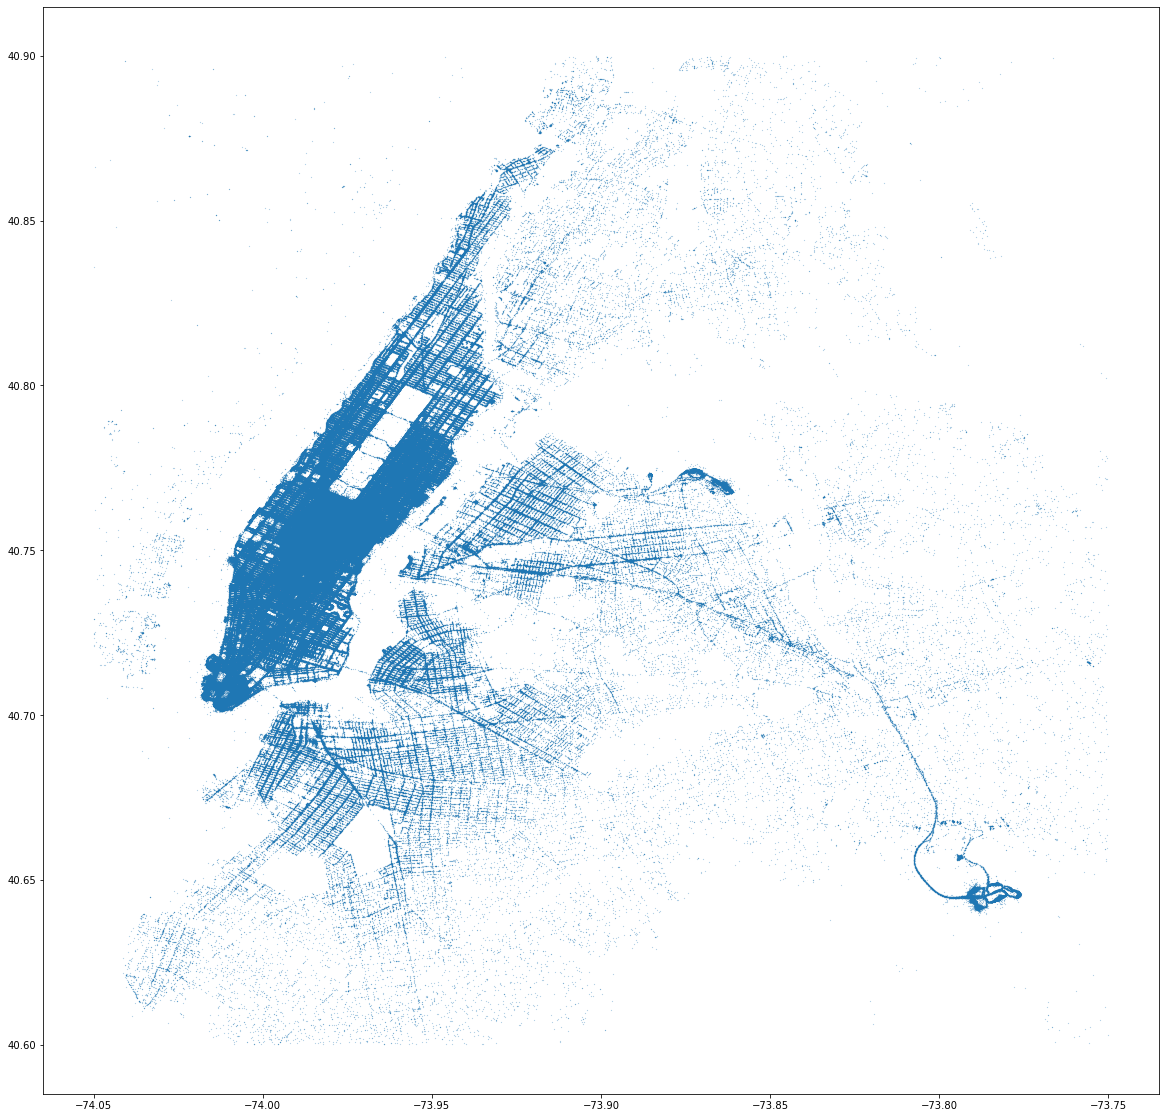

In [18]:
latitude = list(df_train['pickup_latitude']) + list(df_train['dropoff_latitude'])
longitude = list(df_train['pickup_longitude']) + list(df_train['dropoff_longitude'])

plt.figure(figsize = (20, 20))
plt.plot(longitude, latitude, '.', markersize = 0.25) 
plt.show()

From this new plot, the high density of trip pickup and dropoff points in Manhattan and around JFK International Airport is easily apparent.

### Calculating the Distance of Each Trip

The trip distance is likely to be a useful feature for predicting the trip duration.
We can use the Haversine formula to calculate the distance between the pickup and dropoff coordinates. As it is impossible to know exactly what route is taken, we will have to settle for the linear distance between the two points.

In [19]:
from math import radians, sin, cos, sqrt, asin

In [20]:
#Calculate distance in metres between pickup and dropoff coordinate points, add new column to df_train

def haversine(columns):
    lat1, lon1, lat2, lon2 = columns
    R = 6372.8 # Earth radius in kilometers
    
    dLat = radians(lat2 - lat1)
    dLon = radians(lon2 - lon1)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
    
    a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2   #Haversine Formula
    c = 2*asin(sqrt(a))
    
    return (R * c) * 1000

cols = ['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude']
distances = df_train[cols].apply(lambda x: haversine(x),axis = 1)
df_train['distance_m'] = distances.copy()
df_train['distance_m'] = round(df_train.distance_m,0)

### Calculate Average Speed

Using the trip duration and distance, we can also estimate the average speed of each trip. Again, however, as the distances we derive using the Haversine Formula are 'as the crow flies', the speed will also not be an exact or accurate calculation of the road speed of the taxi.

In [21]:
#calculate average speep over the duration of each trip in m/s
df_train['av_speed'] = df_train.distance_m/df_train.trip_duration

In [22]:
print("The average speed of all trips is", df_train.av_speed.mean(),"m/s.")

The average speed of all trips is 3.980839870495266 m/s.


In [23]:
df_train.av_speed.describe()

count    1.451343e+06
mean     3.980840e+00
std      3.161351e+00
min      0.000000e+00
25%      2.531085e+00
50%      3.546028e+00
75%      4.935533e+00
max      2.577143e+03
Name: av_speed, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x13596a70040>,
 'caps': [<matplotlib.lines.Line2D at 0x13596a73c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x13596a70430>],
 'medians': [<matplotlib.lines.Line2D at 0x135f0e10670>],
 'fliers': [<matplotlib.lines.Line2D at 0x135f0e10e20>],
 'means': []}

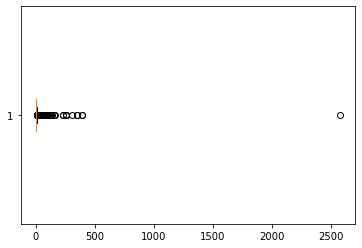

In [24]:
plt.boxplot(x = df_train['av_speed'], vert = False)

In [25]:
#remove outliers
q_hi  = df_train["av_speed"].quantile(0.99)
q_lo = df_train["av_speed"].quantile(0.01)

df_train = df_train[(df_train["av_speed"] < q_hi) & (df_train["av_speed"] > q_lo)]

df_train.av_speed.describe()


count    1.422315e+06
mean     3.923450e+00
std      1.911855e+00
min      4.270613e-01
25%      2.551639e+00
50%      3.546028e+00
75%      4.896642e+00
max      1.117253e+01
Name: av_speed, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x135d7d51ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x135d7ac4f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x135d7d515e0>],
 'medians': [<matplotlib.lines.Line2D at 0x135d7ac4a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x135d7ac4340>],
 'means': []}

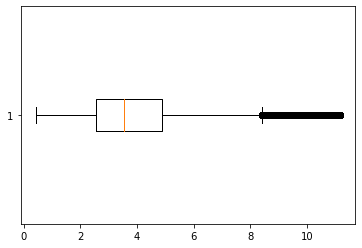

In [26]:
plt.boxplot(x = df_train['av_speed'], vert = False)

In [27]:
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance_m,av_speed
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1499.0,3.294505
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1806.0,2.723982
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6387.0,3.007062
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1486.0,3.463869
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1189.0,2.733333


<AxesSubplot:xlabel='distance_m', ylabel='trip_duration'>

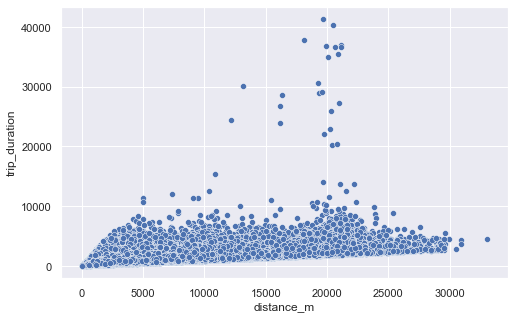

In [28]:
import seaborn as sns

sns.set(rc={'figure.figsize':(8, 5)})
sns.scatterplot(data = df_train, x = 'distance_m', y = 'trip_duration')

{'whiskers': [<matplotlib.lines.Line2D at 0x135802a1a60>,
 'caps': [<matplotlib.lines.Line2D at 0x135802ae160>,
 'boxes': [<matplotlib.lines.Line2D at 0x135802a1700>],
 'medians': [<matplotlib.lines.Line2D at 0x135802ae820>],
 'fliers': [<matplotlib.lines.Line2D at 0x135802aeb80>],
 'means': []}

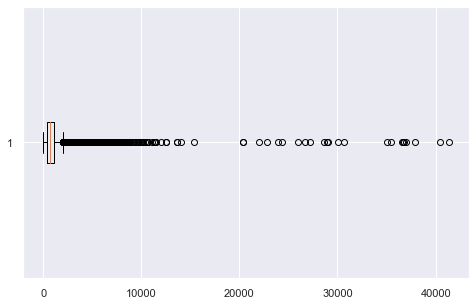

In [29]:
from matplotlib.pyplot import figure

figure(figsize=(8, 5))
plt.boxplot(x = df_train['trip_duration'], vert = False)

In [30]:
#eliminate outliers: exclude trips in excess of 2 hours (7200 seconds)

df_train= df_train[df_train.trip_duration<=7200]

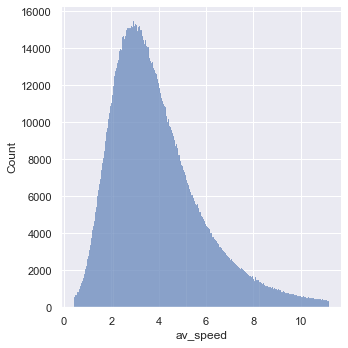

In [31]:
sns.set(rc={'figure.figsize':(8, 5)})
sns.displot(data = df_train, x = 'av_speed')

<AxesSubplot:xlabel='av_speed', ylabel='trip_duration'>

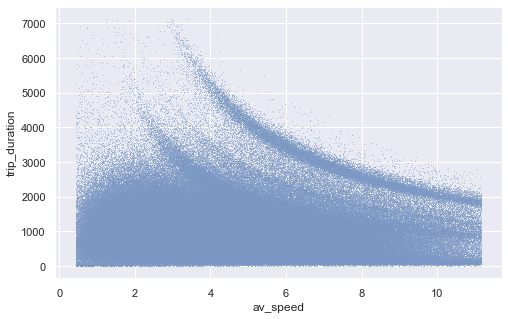

In [32]:
sns.set(rc={'figure.figsize':(8, 5)})
sns.scatterplot(data = df_train, x = 'av_speed', y = 'trip_duration', s = 0.5)

### Distance vs Duration with Line of Best Fit

<AxesSubplot:xlabel='distance_m', ylabel='trip_duration'>

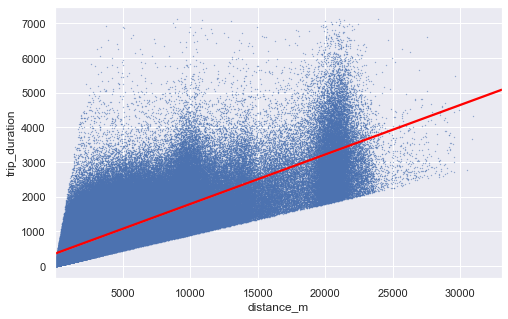

In [33]:
sns.set(rc={'figure.figsize':(8, 5)})
sns.regplot(data = df_train, x = 'distance_m', y = 'trip_duration', scatter_kws={'s':0.1}, line_kws={"color": "red"}, fit_reg = True)

There is clearly a positive linear relationship between distance and trip duration.

<AxesSubplot:xlabel='av_speed', ylabel='distance_m'>

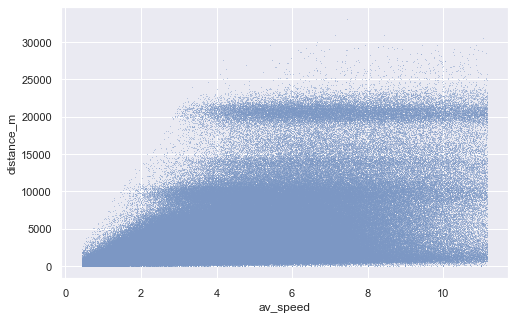

In [34]:
sns.set(rc={'figure.figsize':(8, 5)})
sns.scatterplot(data = df_train, x = 'av_speed', y = 'distance_m', s = 0.5)

{'whiskers': [<matplotlib.lines.Line2D at 0x13586572370>,
 'caps': [<matplotlib.lines.Line2D at 0x13586572a30>,
 'boxes': [<matplotlib.lines.Line2D at 0x13586564fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1358657e130>],
 'fliers': [<matplotlib.lines.Line2D at 0x1358657e490>],
 'means': []}

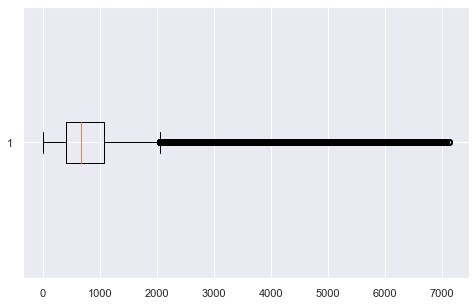

In [35]:
from matplotlib.pyplot import figure

figure(figsize=(8, 5))
plt.boxplot(x = df_train['trip_duration'], vert = False)

Based on the pickup and dropoff datetime features, we will create new features for the hour, day, and month of each pickup and dropoff.

In [36]:
#create new columns for datetime features Hour, Day, and Month

df_train['pickup_day']=df_train['pickup_datetime'].dt.day_name()
df_train['dropoff_day']=df_train['dropoff_datetime'].dt.day_name()

df_train['pickup_month']=df_train['pickup_datetime'].dt.month
df_train['dropoff_month']=df_train['dropoff_datetime'].dt.month

df_train['pickup_hour']=df_train['pickup_datetime'].dt.hour
df_train['dropoff_hour']=df_train['dropoff_datetime'].dt.hour

df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance_m,av_speed,pickup_day,dropoff_day,pickup_month,dropoff_month,pickup_hour,dropoff_hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1499.0,3.294505,Monday,Monday,3,3,17,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1806.0,2.723982,Sunday,Sunday,6,6,0,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6387.0,3.007062,Tuesday,Tuesday,1,1,11,12
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1486.0,3.463869,Wednesday,Wednesday,4,4,19,19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1189.0,2.733333,Saturday,Saturday,3,3,13,13


In [37]:
df_train.pickup_month.value_counts()

3    250083
4    245642
5    242147
2    232335
6    228356
1    223620
Name: pickup_month, dtype: int64

In [38]:
df_train.pickup_day.value_counts()

Friday       218371
Saturday     215362
Thursday     213640
Wednesday    205532
Tuesday      197985
Sunday       189031
Monday       182262
Name: pickup_day, dtype: int64

In [39]:
df_train.pickup_hour.value_counts()

18    89252
19    88923
20    82424
21    82277
22    78416
17    75221
14    72809
12    70463
15    70455
13    70101
23    67442
11    67072
9     66365
8     65661
10    64205
16    63106
7     54018
0     51060
1     36898
6     31729
2     26835
3     19819
4     14326
5     13306
Name: pickup_hour, dtype: int64

In [40]:
df_pickuphour = df_train.value_counts('pickup_hour', sort = False).rename_axis('hour').reset_index(name='pickup_count')
df_pickuphour.head()


,hour,pickup_count
0,0,51060
1,1,36898
2,2,26835
3,3,19819
4,4,14326


In [41]:
df_dropoffhour = df_train.value_counts('dropoff_hour', sort = False).rename_axis('hour').reset_index(name='dropoff_count')
df_dropoffhour.head()

,hour,dropoff_count
0,0,55270
1,1,39936
2,2,28591
3,3,21021
4,4,15768


In [42]:
df_hours = pd.merge(df_dropoffhour, df_pickuphour, how ='inner', on='hour')
df_hours.head()

,hour,dropoff_count,pickup_count
0,0,55270,51060
1,1,39936,36898
2,2,28591,26835
3,3,21021,19819
4,4,15768,14326


### Average Pickup and Dropoff Count by Hour

<AxesSubplot:xlabel='hour'>

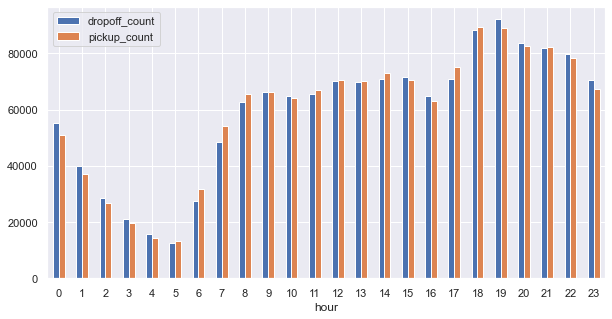

In [43]:
df_hours.plot(x = 'hour', kind = 'bar', figsize = (10, 5), rot = 0)

We can see that the highest volume of trips are between 5pm and 10pm, after which the number of trips declines steadily until roughly 5am.

### Average Pickup Count by Day

<AxesSubplot:xlabel='pickup_day'>

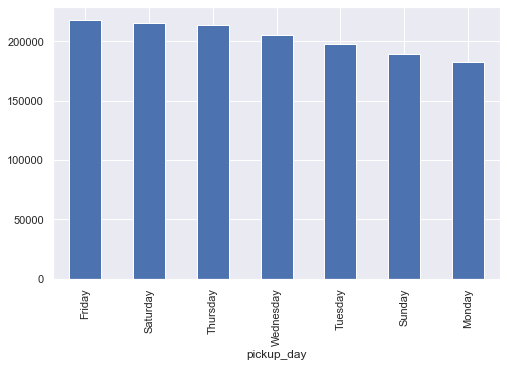

In [44]:
df_train.value_counts('pickup_day').plot(kind='bar', figsize = (8, 5))

Volume of trips appears quite high throughout the week, but with a noticable trend that Friday has the most trips, and Monday the fewest.

### Pickup Count by Month

<AxesSubplot:xlabel='pickup_month'>

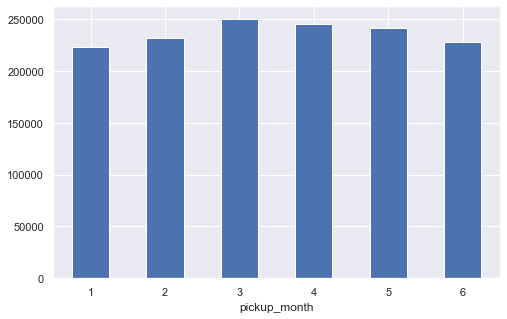

In [45]:
df_train.value_counts('pickup_month', sort = False).plot(kind = 'bar', figsize = (8, 5), rot = 0)

Again, the count appears fairly consistently high, at least from January to June, but with a noticable peak in March. 

### Convert Days of the Week to Numbers

It will be useful to convert the names of the days of the week in the pickup_day and dropoff_day columns to numerical values. <br>
Monday = 0 <br>
Tuesday = 1 <br>
Wednesday = 2 <br>
Thursday = 3 <br>
Friday = 4 <br>
Saturday = 5 <br>
Sunday = 6 <br>

In [46]:
# days to Numbers
# Monday = 0 Sunday = 6
df_train['pickup_day_num'] = df_train['pickup_datetime'].dt.dayofweek
df_train['dropoff_day_num'] = df_train['dropoff_datetime'].dt.dayofweek
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,distance_m,av_speed,pickup_day,dropoff_day,pickup_month,dropoff_month,pickup_hour,dropoff_hour,pickup_day_num,dropoff_day_num
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,1499.0,3.294505,Monday,Monday,3,3,17,17,0,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,1806.0,2.723982,Sunday,Sunday,6,6,0,0,6,6
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,6387.0,3.007062,Tuesday,Tuesday,1,1,11,12,1,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,1486.0,3.463869,Wednesday,Wednesday,4,4,19,19,2,2
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,1189.0,2.733333,Saturday,Saturday,3,3,13,13,5,5


In [47]:
df_train.shape

(1422183, 21)

### Pearson Correlation Coefficient


In [48]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df_train['distance_m'], df_train['trip_duration'])
print('The Pearson correlation coefficient is:', pearson_coef, "with a p_value of:", p_value)

The Pearson correlation coefficient is: 0.7979390777126647 with a p_value of: 0.0


In [49]:
pearson_coef, p_value = stats.pearsonr(df_train['pickup_hour'], df_train['trip_duration'])
print('The Pearson correlation coefficient is:', pearson_coef, "with a p_value of:", p_value)

The Pearson correlation coefficient is: 0.031746562449449886 with a p_value of: 8.3437119163e-314


In [50]:
pearson_coef, p_value = stats.pearsonr(df_train['pickup_day_num'], df_train['trip_duration'])
print('The Pearson correlation coefficient is:', pearson_coef, "with a p_value of:", p_value)

The Pearson correlation coefficient is: -0.03527855179830906 with a p_value of: 0.0


In [51]:
pearson_coef, p_value = stats.pearsonr(df_train['pickup_month'], df_train['trip_duration'])
print('The Pearson correlation coefficient is:', pearson_coef, "with a p_value of:", p_value)

The Pearson correlation coefficient is: 0.06096887850783536 with a p_value of: 0.0


In [52]:
pearson_coef, p_value = stats.pearsonr(df_train['av_speed'], df_train['trip_duration'])
print('The Pearson correlation coefficient is:', pearson_coef, "with a p_value of:", p_value)

The Pearson correlation coefficient is: 0.039086307369134196 with a p_value of: 0.0


### Average Speed by Pickup Hour

Text(0, 0.5, 'average speed')

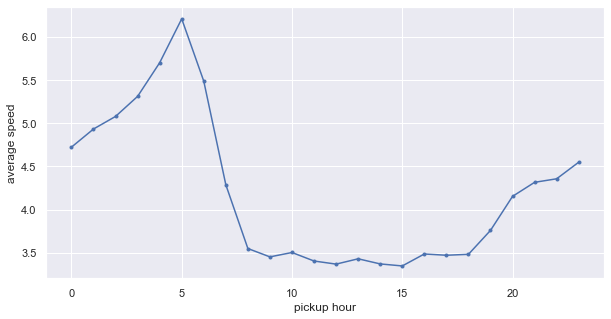

In [53]:
plt.figure(figsize = (10, 5))
plt.plot(df_train.groupby('pickup_hour')['av_speed'].mean(), marker = '.')
plt.xlabel("pickup hour")
plt.ylabel("average speed")

The hour with the highest average speed coincides with the lowest number of trips at around 5am. It is during business hours that the average speed is lowest, and appears consistently so from roughly 8am to 6pm.

Text(0, 0.5, 'average speed')

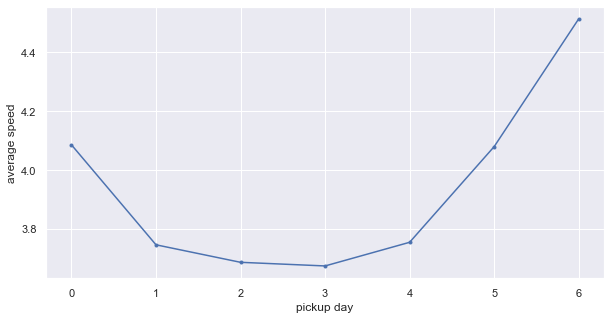

In [54]:
plt.figure(figsize = (10, 5))
plt.plot(df_train.groupby('pickup_day_num')['av_speed'].mean(), marker = '.')
plt.xlabel("pickup day")
plt.ylabel("average speed")

Text(0, 0.5, 'trip duration')

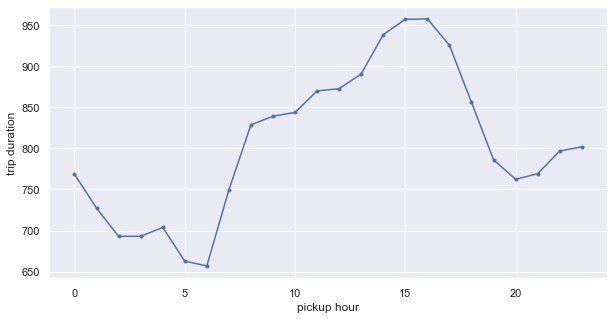

In [55]:
plt.figure(figsize = (10, 5))
plt.plot(df_train.groupby('pickup_hour')['trip_duration'].mean(), marker = '.')
plt.xlabel("pickup hour")
plt.ylabel("trip duration")

### Modelling

In [56]:
df_train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'distance_m', 'av_speed', 'pickup_day', 'dropoff_day',
       'pickup_month', 'dropoff_month', 'pickup_hour', 'dropoff_hour',
       'pickup_day_num', 'dropoff_day_num'],
      dtype='object')

In [57]:
df_modelling = df_train[['distance_m', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
                         'pickup_day_num', 'pickup_hour', 'trip_duration', 'av_speed', 'pickup_month', 'dropoff_month', 'pickup_hour', 
                         'dropoff_hour', 'pickup_day_num', 'dropoff_day_num']]
df_modelling.head()

,distance_m,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_day_num,pickup_hour,trip_duration,av_speed,pickup_month,dropoff_month,pickup_hour,dropoff_hour,pickup_day_num,dropoff_day_num
0,1499.0,1,-73.982155,40.767937,-73.964630,40.765602,0,17,455,3.294505,3,3,17,17,0,0
1,1806.0,1,-73.980415,40.738564,-73.999481,40.731152,6,0,663,2.723982,6,6,0,0,6,6
2,6387.0,1,-73.979027,40.763939,-74.005333,40.710087,1,11,2124,3.007062,1,1,11,12,1,1
3,1486.0,1,-74.010040,40.719971,-74.012268,40.706718,2,19,429,3.463869,4,4,19,19,2,2
4,1189.0,1,-73.973053,40.793209,-73.972923,40.782520,5,13,435,2.733333,3,3,13,13,5,5


In [58]:
df_modelling.columns

Index(['distance_m', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'pickup_day_num',
       'pickup_hour', 'trip_duration', 'av_speed', 'pickup_month',
       'dropoff_month', 'pickup_hour', 'dropoff_hour', 'pickup_day_num',
       'dropoff_day_num'],
      dtype='object')

In [59]:
#Splitting into train and test sets
from sklearn.model_selection import train_test_split

X = df_modelling.drop('trip_duration', 1)
y = df_modelling['trip_duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

### Linear Regression Model

In [60]:
#Fitting Linear regression model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [61]:
#calculating mean squared error of linear regression model
from sklearn.metrics import mean_squared_error

lr_mse = mean_squared_error(lr_pred, y_test)
print("mean squared error:", lr_mse)

mean squared error: 69629.23649078414


In [62]:
lr_rmse = mean_squared_error(lr_pred, y_test, squared = False)
print("root mean squared error:", lr_rmse)

root mean squared error: 263.87352366386466


In [63]:
#calculating mean absolute error of linear regression model

from sklearn.metrics import mean_absolute_error

lr_mae = mean_absolute_error(lr_pred, y_test)
print('mean absolute error: %.3f' % lr_mae)

mean absolute error: 168.921


In [64]:
#calculating r2 of linear regression model

from sklearn.metrics import r2_score

lr_r2 = r2_score(lr_pred, y_test)
print("R^2 value:", lr_r2)

R^2 value: 0.7998985423677614


In [65]:
coefs = pd.DataFrame(lr.coef_,index=X_train.columns)
coefs

,0
distance_m,0.201589
passenger_count,0.188044
pickup_longitude,-1097.536267
pickup_latitude,1512.417386
dropoff_longitude,-734.409748
dropoff_latitude,-10.338338
pickup_day_num,-10.316679
pickup_hour,-1.733847
av_speed,-171.800380
pickup_month,-61.797423


In [66]:
#Linear regression score

lr.score(X_test, y_test)

0.8335289615735982

In [67]:
lr.score(X_train, y_train)

0.8337178380693502

<AxesSubplot:title={'center':'Model Coefficients'}>

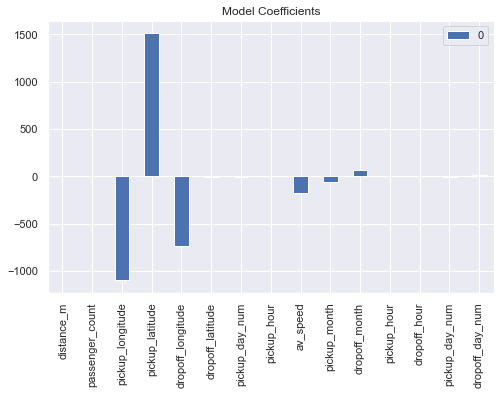

In [68]:
#barchart coefficients
coefs_plot = pd.DataFrame(lr.coef_,index=X_train.columns)
coefs_plot.plot(kind='bar', title='Model Coefficients')

### Random Forest Regression Model

In [69]:
#Fitting Random Forest Model

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("done")

done


In [70]:
#Calculating mean squared error of Random Forest model

from sklearn import metrics

rf_mse = np.sqrt(metrics.mean_squared_error(rf_pred,y_test))
print("mean squared error:", rf_mse)

mean squared error: 5.641824714055597


In [71]:
rf_rmse = np.sqrt(metrics.mean_squared_error(rf_pred, y_test, squared = False))
print("root mean squared error", rf_rmse)

root mean squared error 2.3752525579515953


In [72]:
rf_mae = mean_absolute_error(rf_pred, y_test)
print('mean absolute error: %.3f' % rf_mae)

mean absolute error: 0.857


In [73]:
#Calculating r2 of random forest model

rf_r2 = metrics.r2_score(rf_pred,y_test)
print("R^2 value:", rf_r2)

R^2 value: 0.9999237947875925


In [74]:
#accuracy score of random forest model

rf_score = rf.score(X_test, y_test)
print("test score:", rf_score)

test score: 0.9999238997237208


In [75]:
rf_train_score = rf.score(X_train, y_train)
print("train score:", rf_train_score)

train score: 0.9999894061627267


In [76]:
importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.72936
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00001
Feature: 3, Score: 0.00001
Feature: 4, Score: 0.00001
Feature: 5, Score: 0.00002
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.27055
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00001
Feature: 12, Score: 0.00001
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000


<AxesSubplot:title={'center':'Feature Importance'}>

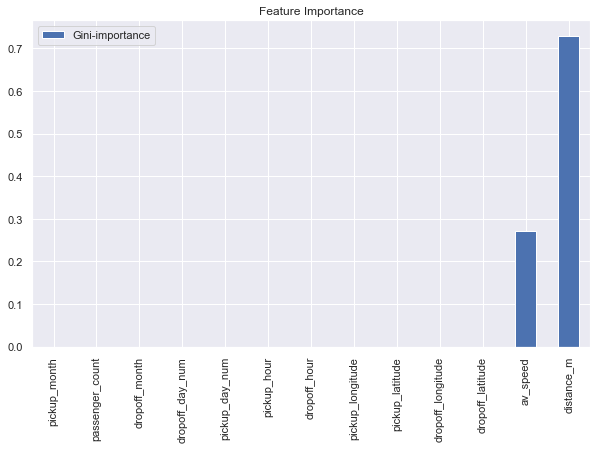

In [77]:
%matplotlib inline

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, rf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=90, figsize = (10, 6), title = "Feature Importance")

In [78]:
#gradient boost regressor

from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=0)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("done")

done


In [79]:
gb_mse = np.sqrt(metrics.mean_squared_error(gb_pred,y_test))
print("mean squared error:", gb_mse)

mean squared error: 37.401723392653246


In [80]:
gb_mse = np.sqrt(metrics.mean_squared_error(gb_pred,y_test, squared = False))
print("root mean squared error:", gb_mse)

root mean squared error: 6.115694841361303


In [81]:
gb_mae = mean_absolute_error(gb_pred, y_test)
print('mean absolute error: %.3f' % gb_mae)

mean absolute error: 22.397


In [82]:
gb_r2 = r2_score(gb_pred, y_test)
print("R^2 value:", gb_r2)

R^2 value: 0.9965143953345249


In [83]:
gb.score(X_test, y_test)

0.9966555070587637

In [84]:
gb.score(X_train, y_train)

0.9967794014319582

In [85]:
importance = gb.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.73068
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.26932
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000


<AxesSubplot:title={'center':'Feature Importance'}>

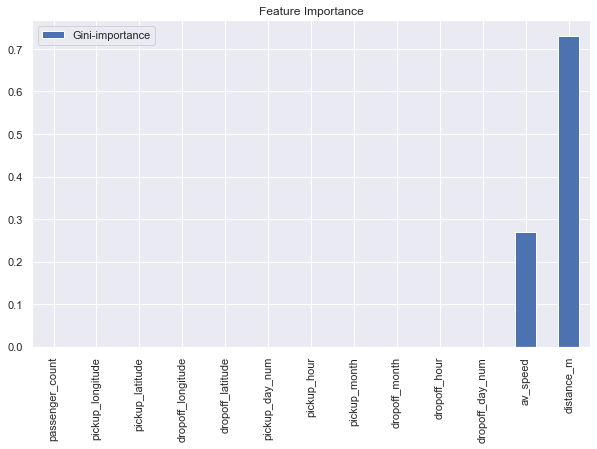

In [86]:
%matplotlib inline

feats_gb = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, gb.feature_importances_):
    feats_gb[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats_gb, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=90, figsize = (10, 6), title = "Feature Importance")

##### 